# Ford GoBike System Data
## by Ahmed Mohamed Sayed

# Investigation Overview

> In this investigation, I wanted to take a deep look at Trip insights. 
such as Distribution of Starting Hours & Starting day week. Also, the distribution of Subscribers, Customers & Gender. Understanding the relationship between variables would help in taking useful marketing steps.

# Dataset Overview

>  The dataset consists of 183412 rows & 16 variables that representing many useful aspects such as Station info, Duration info, Gender info, User type info. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')


In [3]:
# Dropping unneeded columns:
df = df.drop(['start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude',
         'end_station_longitude','bike_id'], axis=1)


In [4]:
# Add duration minutes columnn:
df['duration_min']= df['duration_sec']/60


In [5]:
# Add duration minutes columnn:
df['duration_min']= df['duration_sec']/60


In [6]:
# convert start_time to datetime to extract star_day 0f week & start_hour:
df['start_time'] = pd.to_datetime(df['start_time'])
# Add new column for Start_day of week :
df['start_day'] = df.start_time.dt.strftime('%A')
# Add new column for Start_hour of week :
df['start_hour'] = df.start_time.dt.strftime('%H')
# Convert Start_hour to int:
df['start_hour'] = pd.to_numeric(df['start_hour'])

In [7]:
# Creating Age column:
df['user_age']= 2019 - df['member_birth_year']


In [8]:
# Make a new dataframe :
bike = df.copy()

In [9]:
# Dropping Trips which have duration min > 100 :
bike.drop(bike.index[bike['duration_min'] > 100], inplace = True)

# Distribution of Trip Starting Hours

> Trips Starting Hours distribution is a bimodal distribution. we have two peak periods for trips.
from 6 to 9 AM and from 4 to 6 PM. Most of the trips occurred during rush hours (when going or back from work).In other words, Riders using the Bike Share System Mainly to go to their work.

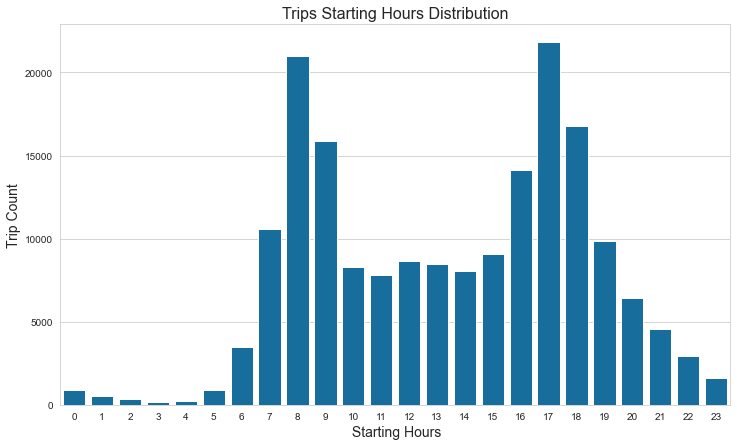

In [10]:
plt.figure(figsize=[12,7])
base_color = sb.color_palette('colorblind')[0]
sb.set_style('whitegrid')
sb.countplot(data=bike , x='start_hour', color = base_color)
plt.xlabel(' Starting Hours' , fontsize = 14)
plt.ylabel('Trip Count' , fontsize = 14)
plt.title('Trips Starting Hours Distribution', fontsize = 16);

# Distriution of Trip Starting Day of week

> The Distribution of Trip Starting Day of the week shows that weekend days have the least Trips among the whole week.

In [11]:
# Exploring Start Day of week Distribution :
plt.figure(figsize=[11,7])
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
w_day_cat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
bike['start_day'] = bike['start_day'].astype(w_day_cat)
base_color = sb.color_palette('colorblind')[0]
sb.set_style('whitegrid')
sb.countplot(data=bike , x='start_day', color = base_color)
plt.xlabel(' Day of week', fontsize = 14)
plt.ylabel('Trip Count' , fontsize = 14)
plt.title('Trips Starting Day of week Distribution', fontsize = 16);


# Distriution of Member Gender

> Distribution Shows that Males use Bike Share System 3 times than Females.

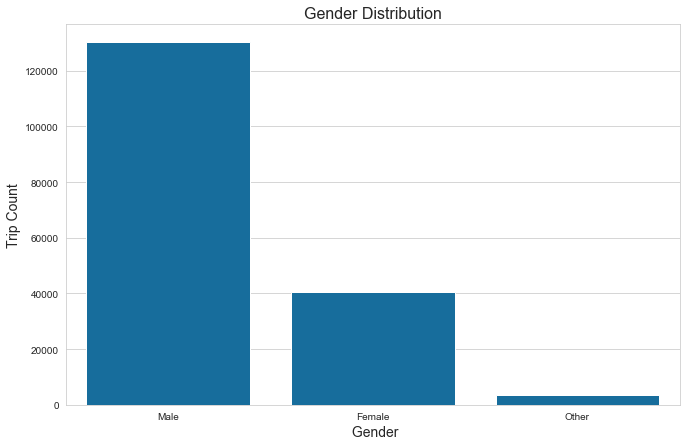

In [12]:
# Exploring Memeber Gender Distribution :
plt.figure(figsize=[11,7])
freq = bike['member_gender'].value_counts()
gen_order = freq.index   
base_color = sb.color_palette('colorblind')[0]
sb.set_style('whitegrid')
sb.countplot(data=bike , x='member_gender', color = base_color, order = gen_order)
plt.xlabel(' Gender', fontsize = 14)
plt.ylabel('Trip Count' , fontsize = 14)
plt.title('Gender Distribution', fontsize = 16);

# Distriution of User Type
> User Type Distribution Shows that 87.5% of Trips occurred by Subscribers & 12.5% by Customers.

In [13]:
plt.figure(figsize=[11,7])
freq = bike['user_type'].value_counts()
gen_order = freq.index   
base_color = sb.color_palette('colorblind')[0]
sb.set_style('whitegrid')
sb.countplot(data=bike , x='user_type', color = base_color, order = gen_order)
plt.xlabel('User Type', fontsize = 14)
plt.ylabel('Trip Count' , fontsize = 14)
plt.title('User Type Distribution', fontsize = 16);

# User Type & Trip Duration
> As the plot Shows. I can understand the trend of each user type. For  Subscribers, the curve is wider (have more data points) in other words they tend to have short & regular trips. unlike Customers who tend to take longer rides.

In [14]:
plt.figure(figsize=[10,7])
sb.violinplot(data=bike, x='user_type' , y='duration_min',color=base_color, inner='quartile')
plt.xlabel('User Type', fontsize = 14)
plt.ylabel('Duration In Minitues' , fontsize = 14);
plt.title('User Type & Trip Duration', fontsize = 16);

# Avergae Trip Duration For User Type & Gender
> According to this Heatmap. I found that average trip duration for females is higher than males. Also,
average trip duration for customers is higher than subscribers.


 >Findings in numbers as follow :
 
 
> - Avg trip duration for female subscribers is 11.6 min.
> - Avg trip duration for male subscribers is 10.27 min.
> - Avg trip duration for female customers is 23.71 min.
> - Avg trip duration for male subscribers is 20.89 min.

> Also, I found something interesting. Males are 3 times higher than females but have avg trip duration lower than females. Also, subscribers are representing 87.5% of the dataset but have a lower avg trip duration than the customers.

In [15]:
plt.figure(figsize=[12,6])
cat_means = df.groupby(['user_type', 'member_gender']).mean()['duration_min']
cat_means = cat_means.reset_index(name = 'duration_min_avg')
cat_means = cat_means.pivot(index = 'member_gender', columns = 'user_type',
                            values = 'duration_min_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_min)'})
plt.title('Average Trip Duration For User Type & Gender', fontsize = 16);

In [16]:
!jupyter nbconvert Ford_GoBike_Exploration_Slide_Deck.ipynb --to slides --no-input

[NbConvertApp] Converting notebook Ford_GoBike_Exploration_Slide_Deck.ipynb to slides
[NbConvertApp] Writing 796655 bytes to Ford_GoBike_Exploration_Slide_Deck.slides.html
